In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
plt.rcParams["font.size"] = 8
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
data_dir = Path('D:/JAN-2025/PEST_CNN_GB/data')
data_dir

WindowsPath('D:/JAN-2025/PEST_CNN_GB/data')

In [4]:
df = pd.DataFrame({'path': list(data_dir.glob('*/*.jpg'))})
df['img_id'] = df['path'].map(lambda x: x.stem)
df['pest'] = df['path'].map(lambda x: x.parent.stem)
print(df.shape, 'images loaded')
df.head()

(6430, 3) images loaded


,path,img_id,pest
0,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-100-_jpg.rf.ea8e371c35a2bde578e530dd3fcc...,Beet Armyworm
1,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-101-_jpg.rf.ecb0cbf6e17685ff3f7e1b76e051...,Beet Armyworm
2,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-102-_jpg.rf.36848ca22c0d5cbda7b818491d48...,Beet Armyworm
3,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-103-_jpg.rf.b72a6059916e808708c347a17678...,Beet Armyworm
4,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-104-_jpg.rf.27b0b32876f197f43abfb52d9436...,Beet Armyworm


In [5]:
df['path'] = df['path'].apply(lambda x: Path(x))

def extract_prefix(file_path):
    prefix = file_path.stem.rsplit('_', 1)[0]
    return prefix

df['label'] = df['path'].apply(extract_prefix)
df

,path,img_id,pest,label
0,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-100-_jpg.rf.ea8e371c35a2bde578e530dd3fcc...,Beet Armyworm,image-100-
1,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-101-_jpg.rf.ecb0cbf6e17685ff3f7e1b76e051...,Beet Armyworm,image-101-
2,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-102-_jpg.rf.36848ca22c0d5cbda7b818491d48...,Beet Armyworm,image-102-
3,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-103-_jpg.rf.b72a6059916e808708c347a17678...,Beet Armyworm,image-103-
4,D:\JAN-2025\PEST_CNN_GB\data\Beet Armyworm\ima...,image-104-_jpg.rf.27b0b32876f197f43abfb52d9436...,Beet Armyworm,image-104-
...,...,...,...,...
6425,D:\JAN-2025\PEST_CNN_GB\data\Yellow Mite\yello...,yellow_mite_0_9853,Yellow Mite,yellow_mite_0
6426,D:\JAN-2025\PEST_CNN_GB\data\Yellow Mite\yello...,yellow_mite_0_9890,Yellow Mite,yellow_mite_0
6427,D:\JAN-2025\PEST_CNN_GB\data\Yellow Mite\yello...,yellow_mite_0_9906,Yellow Mite,yellow_mite_0
6428,D:\JAN-2025\PEST_CNN_GB\data\Yellow Mite\yello...,yellow_mite_0_9938,Yellow Mite,yellow_mite_0


In [6]:
df['label'].value_counts()

label
spilosoma_obliqua_0                409
Aug_Earias cupreoviridis Walker    381
Aug_Anomis Sabulifera Guenee       372
Aug_Aphis gossypii Glover          364
Jute_stem_weevil_0                 360
                                  ... 
jpg-2075-                            1
jpg-2077-                            1
jpg-2084-                            1
jpg-2090-                            1
14080                                1
Name: count, Length: 991, dtype: int64

In [7]:
df.nunique()

path      6430
img_id    6422
pest        17
label      991
dtype: int64

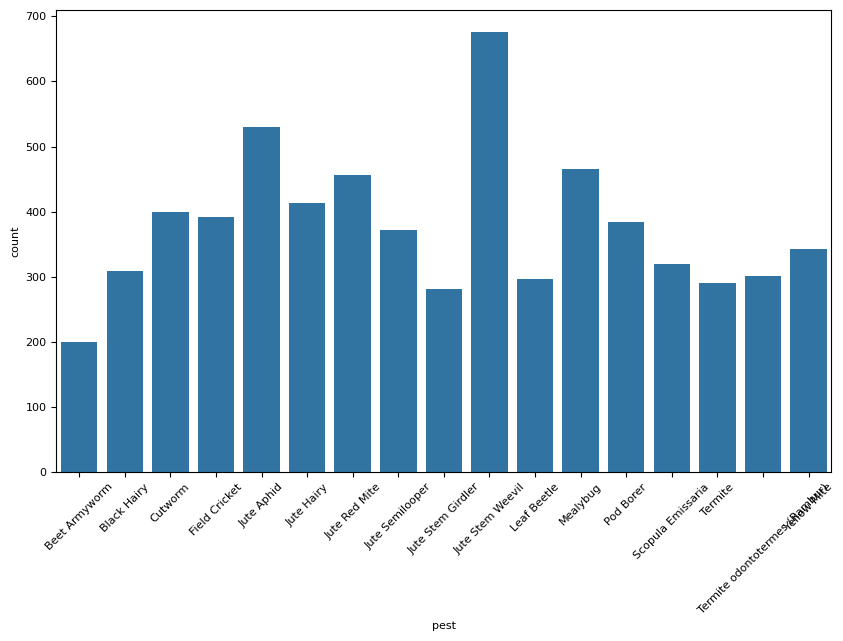

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.countplot(df, x='pest')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

X = df['path']
y = df['pest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5144,) (5144,)
(1286,) (1286,)


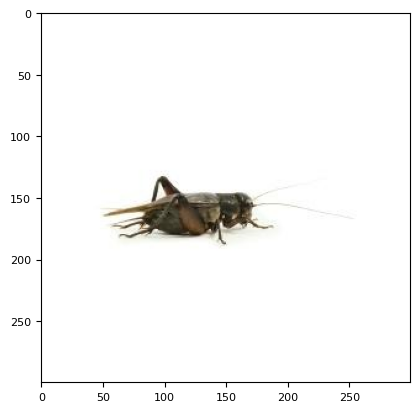

(300, 300, 3)

In [11]:
image = plt.imread(X_train.iloc[1])
plt.imshow(image)
plt.show()

image.shape

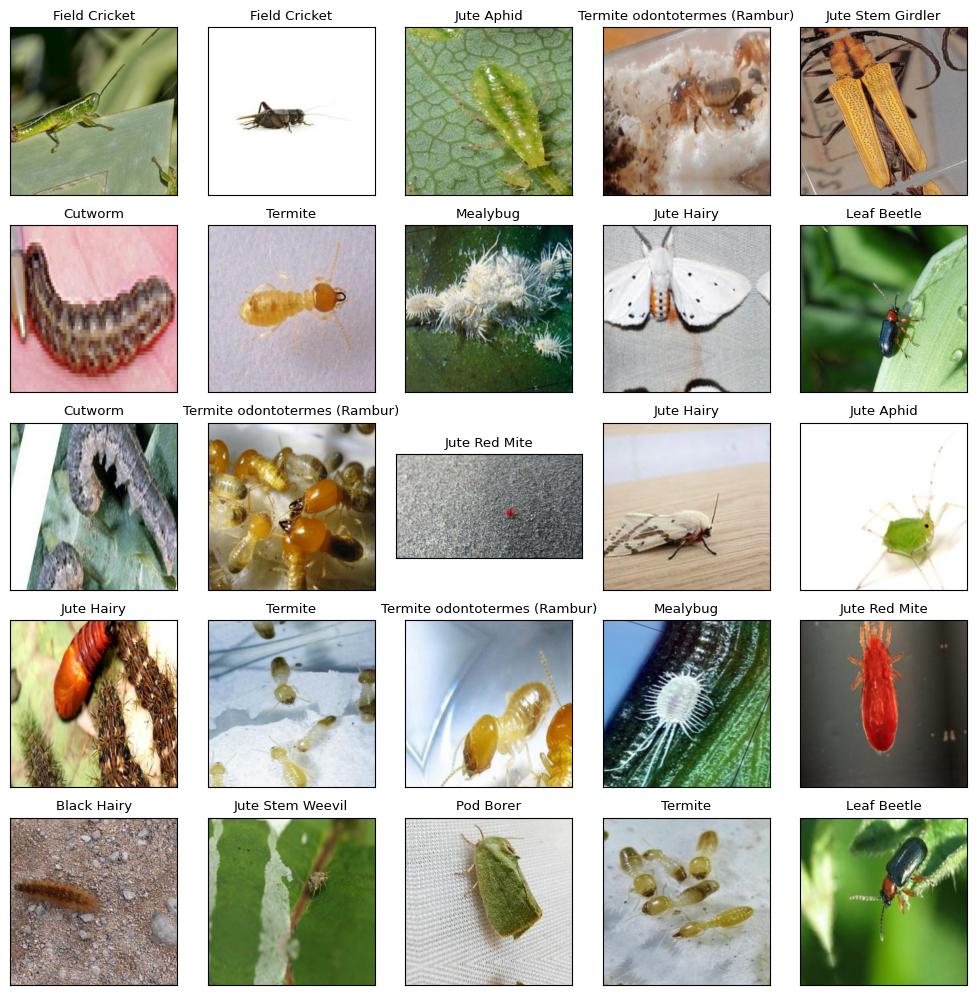

In [12]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_train.iloc[i]))
    ax.set_title(y_train.iloc[i])
plt.tight_layout()
plt.show()

In [13]:
trainData = pd.DataFrame({'path':X_train, 'pest':y_train})
trainData.loc[:, 'path'] = trainData['path'].astype(str)

# train_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# 
train_generator = train_datagen.flow_from_dataframe(
    dataframe=trainData,
    x_col='path',         
    y_col='pest',      
    target_size=(224, 224), 
    batch_size=32,        
    class_mode='sparse'  # Use sparse if labels are integers
)


Found 5144 validated image filenames belonging to 17 classes.


In [14]:
testData = pd.DataFrame({'path':X_test, 'pest':y_test})
testData.loc[:, 'path'] = testData['path'].astype(str)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=testData,
    x_col='path',         
    y_col='pest',      
    target_size=(224, 224), 
    batch_size=32,        
    class_mode='sparse'  # Use 'sparse' if labels are integers
)


Found 1286 validated image filenames belonging to 17 classes.


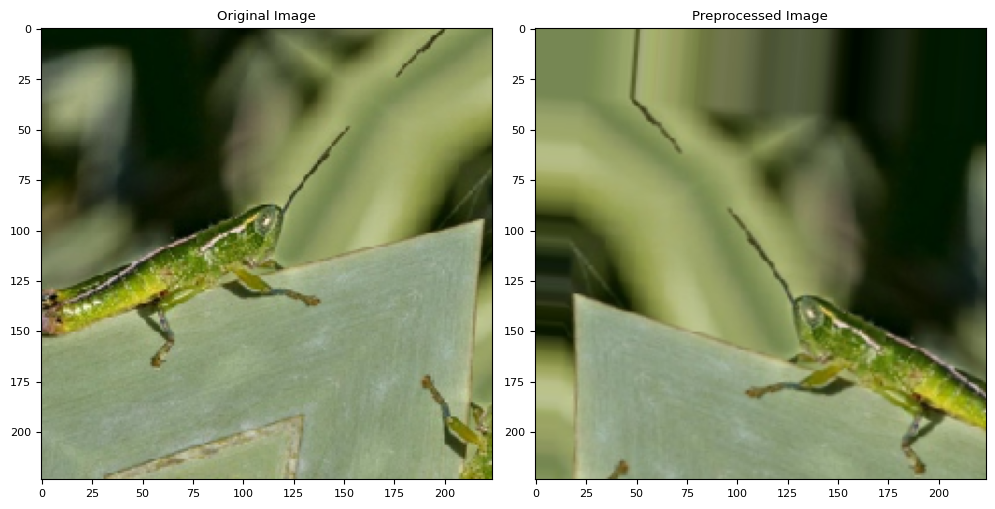

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Define the same image data generator used for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to [0, 1]
    rotation_range=20,          # Randomly rotate images by 20 degrees
    width_shift_range=0.2,      # Randomly shift images horizontally
    height_shift_range=0.2,     # Randomly shift images vertically
    shear_range=0.2,            # Shear angle in counter-clockwise direction
    zoom_range=0.2,             # Randomly zoom in
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill mode for pixels outside input boundaries
)

# Load a single image (adjust the path as needed)
image_path = str(X_train.iloc[0])  # Use one of the images from X_train (converted to string)
img = load_img(image_path, target_size=(224, 224))  # Load image with target size
img_array = img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Generate the augmented image (preprocessing)
it = datagen.flow(img_array, batch_size=1)
preprocessed_image = next(it)[0]  # Use next() as a function, not a method

# Display the original and preprocessed images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0] / 255.)  # Normalize original image for display
plt.title("Original Image")

# Preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image)  # Already rescaled in the range [0, 1]
plt.title("Preprocessed Image")

plt.tight_layout()
plt.show()


In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import numpy as np

# Define directories
train_folder = 'D:/JAN-2025/PEST_CNN_GB/data'               # Path to your training images folder with subfolders for each class (e.g., normal, parkinson)
preprocessed_folder = 'D:/JAN-2025/PEST_CNN_GB/preprocessed' # Path to save preprocessed images

# Create the output directory if it doesn't exist
os.makedirs(preprocessed_folder, exist_ok=True)

# Define the image data generator with augmentation settings
datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to [0, 1]
    rotation_range=20,          # Randomly rotate images by 20 degrees
    width_shift_range=0.2,      # Randomly shift images horizontally
    height_shift_range=0.2,     # Randomly shift images vertically
    shear_range=0.2,            # Shear angle in counter-clockwise direction
    zoom_range=0.2,             # Randomly zoom in
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill mode for pixels outside input boundaries
)

# Loop through each class folder (e.g., normal, parkinson)
for class_folder in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_folder)
    if not os.path.isdir(class_path):
        continue
    
    # Create a corresponding class folder in the preprocessed directory
    class_preprocessed_path = os.path.join(preprocessed_folder, class_folder)
    os.makedirs(class_preprocessed_path, exist_ok=True)

    # Loop through each image in the class folder
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        
        # Load and preprocess each image
        img = load_img(image_path, target_size=(224, 224))  # Resize image if needed
        img_array = img_to_array(img)                       # Convert to array
        img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension
        
        # Generate augmented images and save them
        for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
            preprocessed_image = array_to_img(batch[0])  # Convert array back to image
            save_path = os.path.join(class_preprocessed_path, f"aug_{i}_{filename}")  # Save path
            
            # Save the image
            preprocessed_image.save(save_path)
            
            # Break after saving one augmented version per image (adjust as needed)
            if i >= 0:
                break

print("Preprocessing and saving of images for both classes complete.")


Preprocessing and saving of images for both classes complete.


In [17]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import numpy as np

# Define directories
train_folder = 'D:/JAN-2025/PEST_CNN_GB/preprocessed'               # Path to your training images folder with subfolders for each class (e.g., normal, parkinson)
preprocessed_folder = 'D:/JAN-2025/PEST_CNN_GB/Feature' # Path to save preprocessed images with feature extraction applied

# Create the output directory if it doesn't exist
os.makedirs(preprocessed_folder, exist_ok=True)

# Define the image data generator with augmentation settings
datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to [0, 1]
    rotation_range=20,          # Randomly rotate images by 20 degrees
    width_shift_range=0.2,      # Randomly shift images horizontally
    height_shift_range=0.2,     # Randomly shift images vertically
    shear_range=0.2,            # Shear angle in counter-clockwise direction
    zoom_range=0.2,             # Randomly zoom in
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill mode for pixels outside input boundaries
)

# Function to apply Gabor filter
def apply_gabor_filter(img):
    gabor_kernels = []
    ksize = 31  # Size of the Gabor kernel
    for theta in np.arange(0, np.pi, np.pi / 4):  # Creating 4 orientations
        kernel = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        gabor_kernels.append(kernel)
    
    # Apply each kernel to the image
    filtered_images = [cv2.filter2D(img, cv2.CV_8UC3, k) for k in gabor_kernels]
    return np.mean(filtered_images, axis=0).astype(np.uint8)  # Average response

# Function to apply edge detection (e.g., Canny)
def apply_edge_detection(img):
    edges = cv2.Canny(img, threshold1=100, threshold2=200)
    return edges

# Loop through each class folder (e.g., normal, parkinson)
for class_folder in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_folder)
    if not os.path.isdir(class_path):
        continue
    
    # Create a corresponding class folder in the preprocessed directory
    class_preprocessed_path = os.path.join(preprocessed_folder, class_folder)
    os.makedirs(class_preprocessed_path, exist_ok=True)

    # Loop through each image in the class folder
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        
        # Load and preprocess each image
        img = load_img(image_path, target_size=(224, 224))  # Resize image if needed
        img_array = img_to_array(img)                       # Convert to array
        img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension
        
        # Generate augmented images and apply filters
        for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
            augmented_image = batch[0]
            augmented_image = (augmented_image * 255).astype(np.uint8)  # Rescale back to [0, 255]
            
            # Apply Gabor filter
            gabor_image = apply_gabor_filter(augmented_image)
            
            # Apply edge detection
            edges_image = apply_edge_detection(augmented_image)
            
            # Save Gabor filtered image
            gabor_save_path = os.path.join(class_preprocessed_path, f"gabor_aug_{i}_{filename}")
            cv2.imwrite(gabor_save_path, gabor_image)
            
            # Save edge-detected image
            edges_save_path = os.path.join(class_preprocessed_path, f"edges_aug_{i}_{filename}")
            cv2.imwrite(edges_save_path, edges_image)
            
            # Break after saving one augmented version per image (adjust as needed)
            if i >= 0:
                break

print("Augmentation, filtering, and feature extraction complete.")


Augmentation, filtering, and feature extraction complete.


In [20]:
# Creating DataFrame with image paths and labels
trainData = pd.DataFrame({'path': X_train, 'pest': y_train})
trainData.loc[:, 'path'] = trainData['path'].astype(str)  # Ensure paths are strings

# Define ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate training data with 17 classes
train_generator = train_datagen.flow_from_dataframe(
    dataframe=trainData,
    x_col='path',         # Column containing image paths
    y_col='pest',         # Column containing labels (class names or indices)
    target_size=(224, 224), 
    batch_size=32,        
    class_mode='categorical'  # For multi-class classification (17 classes)
)

Found 5144 validated image filenames belonging to 17 classes.


In [21]:
# Creating DataFrame for test data
testData = pd.DataFrame({'path': X_test, 'pest': y_test})
testData.loc[:, 'path'] = testData['path'].astype(str)  # Ensure paths are strings

# Define ImageDataGenerator for test data (No Augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate test data with 17 classes
test_generator = test_datagen.flow_from_dataframe(
    dataframe=testData,
    x_col='path',         # Column containing image paths
    y_col='pest',      # Column containing labels (class names or indices)
    target_size=(224, 224), 
    batch_size=32,        
    class_mode='categorical'  # For multi-class classification (17 classes)
)

Found 1286 validated image filenames belonging to 17 classes.


In [22]:
def loss_history_plot(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

In [23]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model, Sequential

from tensorflow.keras.optimizers import Adam

In [28]:
def train_model(base_model):
    for layer in base_model.layers[:-5]:
            layer.trainable = False
    
    top_model = base_model.output
    top_model = Flatten(name="flatten")(top_model)
#     top_model = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(top_model)
    top_model = Dropout(0.5)(top_model)
    output_layer = Dense(17, activation='sigmoid')(top_model)
    model = Model(inputs=base_model.input, outputs=output_layer)
    
    
#     new_learning_rate = 0.0001 
#     custom_optimizer = Adam(learning_rate=new_learning_rate)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    
    history = model.fit(train_generator, epochs=25, validation_data=test_generator, batch_size = 32)
    
    return model, history

In [29]:
from keras.applications import VGG16
from tensorflow.keras import regularizers
VGG = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [30]:
model, history = train_model(VGG) 
model.summary()

Epoch 1/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 1332s 8s/step - accuracy: 0.0927 - loss: 0.2664 - val_accuracy: 0.1843 - val_loss: 0.2013
Epoch 2/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 1231s 8s/step - accuracy: 0.2606 - loss: 0.1897 - val_accuracy: 0.5342 - val_loss: 0.1349
Epoch 3/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 848s 5s/step - accuracy: 0.4852 - loss: 0.1462 - val_accuracy: 0.6322 - val_loss: 0.1076
Epoch 4/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 926s 6s/step - accuracy: 0.6127 - loss: 0.1172 - val_accuracy: 0.7100 - val_loss: 0.0936
Epoch 5/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 1023s 6s/step - accuracy: 0.6746 - loss: 0.0995 - val_accuracy: 0.7862 - val_loss: 0.0725
Epoch 6/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 1123s 7s/step - accuracy: 0.7360 - loss: 0.0828 - val_accuracy: 0.8243 - val_loss: 0.0649
Epoch 7/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 999s 6s/step - accuracy: 0.7933 - loss: 0.0686 - val_accuracy: 0.8289 - val_loss: 0.0669
Epoch 8/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 1020s 6s/step - accuracy: 0.7767 - loss: 0.0789 - val

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 30,153,077 (115.02 MB)

 Trainable params: 7,505,937 (28.63 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 15,011,876 (57.27 MB)

In [ ]:
accuracy = accuracy_score(true_labels, predictions)
print('Val Accuracy = %.2f' % accuracy)

In [ ]:
loss_history_plot(history)

In [ ]:
model.save("D:/JAN-2025/PEST_CNN_GB/PEST_Detection.h5")